In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the data
data = pd.read_csv('./Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Polynomial Regression is done by introducing higher degree terms in our regression problem to make it easier to fit a line through the data

In [4]:
#In the given data Position and Level are the same, remove position
new_data = data.drop('Position',axis=1)

In [5]:
x,y = new_data.iloc[:,0],new_data.iloc[:,1]

Here x only has one feature, therefore we will introduce higher degree terms in it <br>
$x^2 , x^3 , etc$

In [6]:
def polynomial_regression(x,y,degree,alpha=0.001,eps=10e-10,lam=0):
    """
    This function will fit the given data x to y
    
    x: array containing the data
    y: array containing regression values
    degree: int value stating the highest degree polynomial to be introduced
    alpha=0.001: Learning Rate
    eps=10e-4: tolerance 
    lam=0: value of L2 regularisation parameter
    """
    dummy1 = x
    dummy_temp = x
    
    for d in range(degree-1):
        dummy_temp = x*dummy_temp
        dummy1 = np.append(dummy1,dummy_temp,axis=1)
        
    # new data with the higher degree terms
    augmented_data = dummy1
    
    # normalise data
    xmean = np.mean(augmented_data,axis=0)
    xstd = np.std(augmented_data,axis=0)
    augmented_data = (augmented_data-xmean)/xstd
    
    ymean = np.mean(y)
    ystd = np.std(y)
    y = (y-ymean)/ystd
    
    del dummy1,dummy_temp
    
    def objective_function(x,y,theta,theta_0):
        MSE = np.sum(np.square(x@theta + theta_0 - y) + lam*0.5*np.square(np.linalg.norm(theta)))
        return (MSE/x.shape[0]*2)
    
    def fdash_theta(x,y,theta,theta_0):
        ans = (x@theta+theta_0-y ).T@x + lam*np.linalg.norm(theta)
        return 2*ans.T/x.shape[0]
    
    def fdash_theta0(x,y,theta,theta_0):
        ans = np.sum(x@theta+theta_0-y)
        return 2*ans/x.shape[0]
         
    
    # Gradient Descent
    
    theta_i = np.zeros(shape=(augmented_data.shape[1],1))
    theta_0i = np.zeros(1)
    
    i = 0
    
    while True:
        
        mse_i = objective_function(augmented_data,y,theta_i,theta_0i)
        
        history_thet = 1
        history_thet0 = 1
        
        theta_f = theta_i - alpha*fdash_theta(augmented_data,y,theta_i,theta_0i)
        theta_0f = theta_0i - alpha*fdash_theta0(augmented_data,y,theta_i,theta_0i)
        
        mse_f = objective_function(augmented_data,y,theta_f,theta_0f)
        
        if i%50000==0:
            print("MSE at step {} is {}".format(i,mse_f))
        i+=1
        
        if abs(mse_f-mse_i)<=eps:
            print("MSE at step {} is {}".format(i,mse_f))
            break
                
        theta_i = theta_f
        theta_0i = theta_0f
        
    return theta_f,theta_0f

In [7]:
# since they are series
x = np.array(x).reshape(10,1)
y = np.array(y).reshape(10,1)
theta,theta_0 = polynomial_regression(x,y,5,lam=0.05,alpha=10e-4,eps=10e-10)

MSE at step 0 is 1.9653482736103016
MSE at step 18022 is 0.07094906767396748


In [8]:
def plotter(x,y,degree,theta):
    dummy1 = x
    dummy_temp = x

    for d in range(degree-1):
        dummy_temp = x*dummy_temp
        dummy1 = np.append(dummy1,dummy_temp,axis=1)

    # new data with the higher degree terms
    augmented_data = dummy1

    ymean = np.mean(y)
    ystd = np.std(y)
    xmean = np.mean(augmented_data,axis=0)
    xstd = np.std(augmented_data,axis=0)
    plt.plot(x,(((augmented_data-xmean)/xstd@theta)*ystd+ymean),label='degree '+str(degree))

MSE at step 0 is 1.9946532900808145
MSE at step 6067 is 0.7276340598080916
MSE at step 0 is 1.9880678279112227
MSE at step 8099 is 0.41904660247819675
MSE at step 0 is 1.980790708314253
MSE at step 6213 is 0.24068068745884333


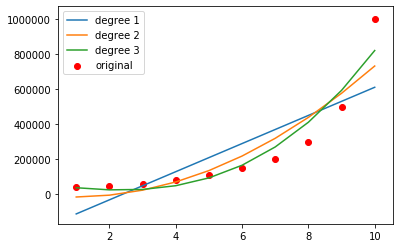

In [9]:
for d in range(1,4):
    theta,theta_0 = polynomial_regression(x,y,d,lam=0.1,alpha=10e-4,eps=10e-10)
    plotter(x,y,d,theta)
plt.scatter(x,y,label='original',color='red')
plt.legend()

In [10]:
# Linear Regression Formula

In case of Linear Regression- <br>
$\theta = (X^{T}X)^{-1}X^{T}Y$

In [11]:
dummy1 = x
dummy_temp = x
degree = 5

for d in range(degree-1):
    dummy_temp = x*dummy_temp
    dummy1 = np.append(dummy1,dummy_temp,axis=1)

# new data with the higher degree terms
augmented_data = dummy1

ymean = np.mean(y)
ystd = np.std(y)
xmean = np.mean(augmented_data,axis=0)
xstd = np.std(augmented_data,axis=0)

adj_data = (augmented_data-xmean)/xstd
adj_labels = (y-ymean)/ystd

thet = np.linalg.inv(adj_data.T @ adj_data)@adj_data.T@adj_labels

In [12]:
thet

array([[  1.62551679],
       [-11.45825463],
       [ 32.33775881],
       [-39.04944978],
       [ 17.59131773]])